In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import warnings
from collections import defaultdict
from vit_keras import vit

%matplotlib inline

warnings.filterwarnings('ignore')

2021-11-25 04:50:39.124507: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-25 04:50:39.124554: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
BATCH_SIZE = 16

CUR_PATH = os.path.abspath('')
MODELS_PATH = CUR_PATH + '/../../models'
TRAIN_PATH = CUR_PATH + '/../../../dataset/data/classified'
VALID_PATH = CUR_PATH + '/../../../dataset/data/validation'
TEST_PATH = CUR_PATH + '/../../../dataset/data/test'

classes = {0 : "Baby",
           1 : "Not Baby"}

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                          samplewise_center = True,
                                                          samplewise_std_normalization = True)

val_test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                          samplewise_center = True,
                                                          samplewise_std_normalization = True)


val_test_datagen.apply_transform

scores = defaultdict(list)

In [3]:
IMAGE_SIZE = 160

res = tf.keras.models.load_model(MODELS_PATH + "/model_resnet.h5")
res_ft = tf.keras.models.load_model(MODELS_PATH + "/model_resnet_ft.h5")

train_ds = datagen.flow_from_directory(
        directory=TRAIN_PATH,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        seed=1,
        color_mode='rgb',
        shuffle=True,
        class_mode='binary')

val_ds = val_test_datagen.flow_from_directory(
        directory=VALID_PATH,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        color_mode='rgb',
        shuffle=True,
        class_mode='binary')

test_ds = val_test_datagen.flow_from_directory(
        TEST_PATH,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        color_mode = 'rgb',
        class_mode='binary')

scores['ResNet-50 RT'].append(res.evaluate(train_ds))
scores['ResNet-50 FT'].append(res_ft.evaluate(train_ds))
scores['ResNet-50 RT'].append(res.evaluate(val_ds))
scores['ResNet-50 FT'].append(res_ft.evaluate(val_ds))
scores['ResNet-50 RT'].append(res.evaluate(test_ds))
scores['ResNet-50 FT'].append(res_ft.evaluate(test_ds))

2021-11-25 04:50:41.156492: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /mnt/disk/miniconda3/envs/face/lib/python3.9/site-packages/cv2/../../lib64:
2021-11-25 04:50:41.156536: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-25 04:50:41.156567: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (snf-22339): /proc/driver/nvidia/version does not exist
2021-11-25 04:50:41.156907: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 135 images belonging to 2 classes.
Found 31 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


2021-11-25 04:50:49.125043: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


2/2 [==============================] - 1s 64ms/step - loss: 0.2647 - accuracy: 0.8889


In [4]:
IMAGE_SIZE = 224

train_ds = datagen.flow_from_directory(
        TRAIN_PATH,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        seed = 1,
        color_mode = 'rgb',
        shuffle = True,
        class_mode='binary')

val_ds = val_test_datagen.flow_from_directory(
        VALID_PATH,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        color_mode = 'rgb',
        shuffle = True,
        class_mode='binary')

test_ds = val_test_datagen.flow_from_directory(
        TEST_PATH,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        color_mode='rgb',
        class_mode='binary')

vgg_res = tf.keras.models.load_model(MODELS_PATH + "/model_vggface_resnet.h5")
vgg_res_ft = tf.keras.models.load_model(MODELS_PATH + "/model_vggface_resnet_ft.h5")

scores['VGGFace (ResNet-50) RT'].append(vgg_res.evaluate(train_ds))
scores['VGGFace (ResNet-50) FT'].append(vgg_res_ft.evaluate(train_ds))
scores['VGGFace (ResNet-50) RT'].append(vgg_res.evaluate(val_ds))
scores['VGGFace (ResNet-50) FT'].append(vgg_res_ft.evaluate(val_ds))
scores['VGGFace (ResNet-50) RT'].append(vgg_res.evaluate(test_ds))
scores['VGGFace (ResNet-50) FT'].append(vgg_res_ft.evaluate(test_ds))

Found 135 images belonging to 2 classes.
Found 31 images belonging to 2 classes.
Found 18 images belonging to 2 classes.
2/2 [==============================] - 1s 69ms/step - loss: 0.6918 - accuracy: 0.5000


In [5]:
IMAGE_SIZE = 224

test_ds = val_test_datagen.flow_from_directory(
        TEST_PATH,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        color_mode = 'rgb',
        class_mode='binary')

vgg_vgg = tf.keras.models.load_model(MODELS_PATH + "/model_vggface_vgg.h5")
vgg_vgg_ft = tf.keras.models.load_model(MODELS_PATH + "/model_vggface_vgg_ft.h5")

scores['VGGFace (VGG16) RT'].append(vgg_vgg.evaluate(train_ds))
scores['VGGFace (VGG16) FT'].append(vgg_vgg_ft.evaluate(train_ds))
scores['VGGFace (VGG16) RT'].append(vgg_vgg.evaluate(val_ds))
scores['VGGFace (VGG16) FT'].append(vgg_vgg_ft.evaluate(val_ds))
scores['VGGFace (VGG16) RT'].append(vgg_vgg.evaluate(test_ds))
scores['VGGFace (VGG16) FT'].append(vgg_vgg_ft.evaluate(test_ds))

Found 18 images belonging to 2 classes.
2/2 [==============================] - 1s 121ms/step - loss: 0.2049 - accuracy: 0.9444


In [6]:
IMAGE_SIZE = 160

vit = tf.keras.models.load_model(MODELS_PATH + "/model_vit.h5")

train_ds = datagen.flow_from_directory(
        TRAIN_PATH,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        seed = 1,
        color_mode = 'rgb',
        shuffle = True,
        class_mode='binary')

val_ds = val_test_datagen.flow_from_directory(
        VALID_PATH,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        color_mode = 'rgb',
        shuffle = True,
        class_mode='binary')

test_ds = val_test_datagen.flow_from_directory(
        TEST_PATH,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        color_mode = 'rgb',
        class_mode='binary')

scores['ViT RT'].append(vit.evaluate(train_ds))
scores['ViT RT'].append(vit.evaluate(val_ds))
scores['ViT RT'].append(vit.evaluate(test_ds))

Found 135 images belonging to 2 classes.
Found 31 images belonging to 2 classes.
Found 18 images belonging to 2 classes.
2/2 [==============================] - 1s 93ms/step - loss: 0.1122 - accuracy: 0.9444


[0.43703705072402954, 0.970370352268219, 0.5703703761100769, 0.5925925970077515, 0.8814814686775208, 0.9555555582046509, 0.970370352268219]


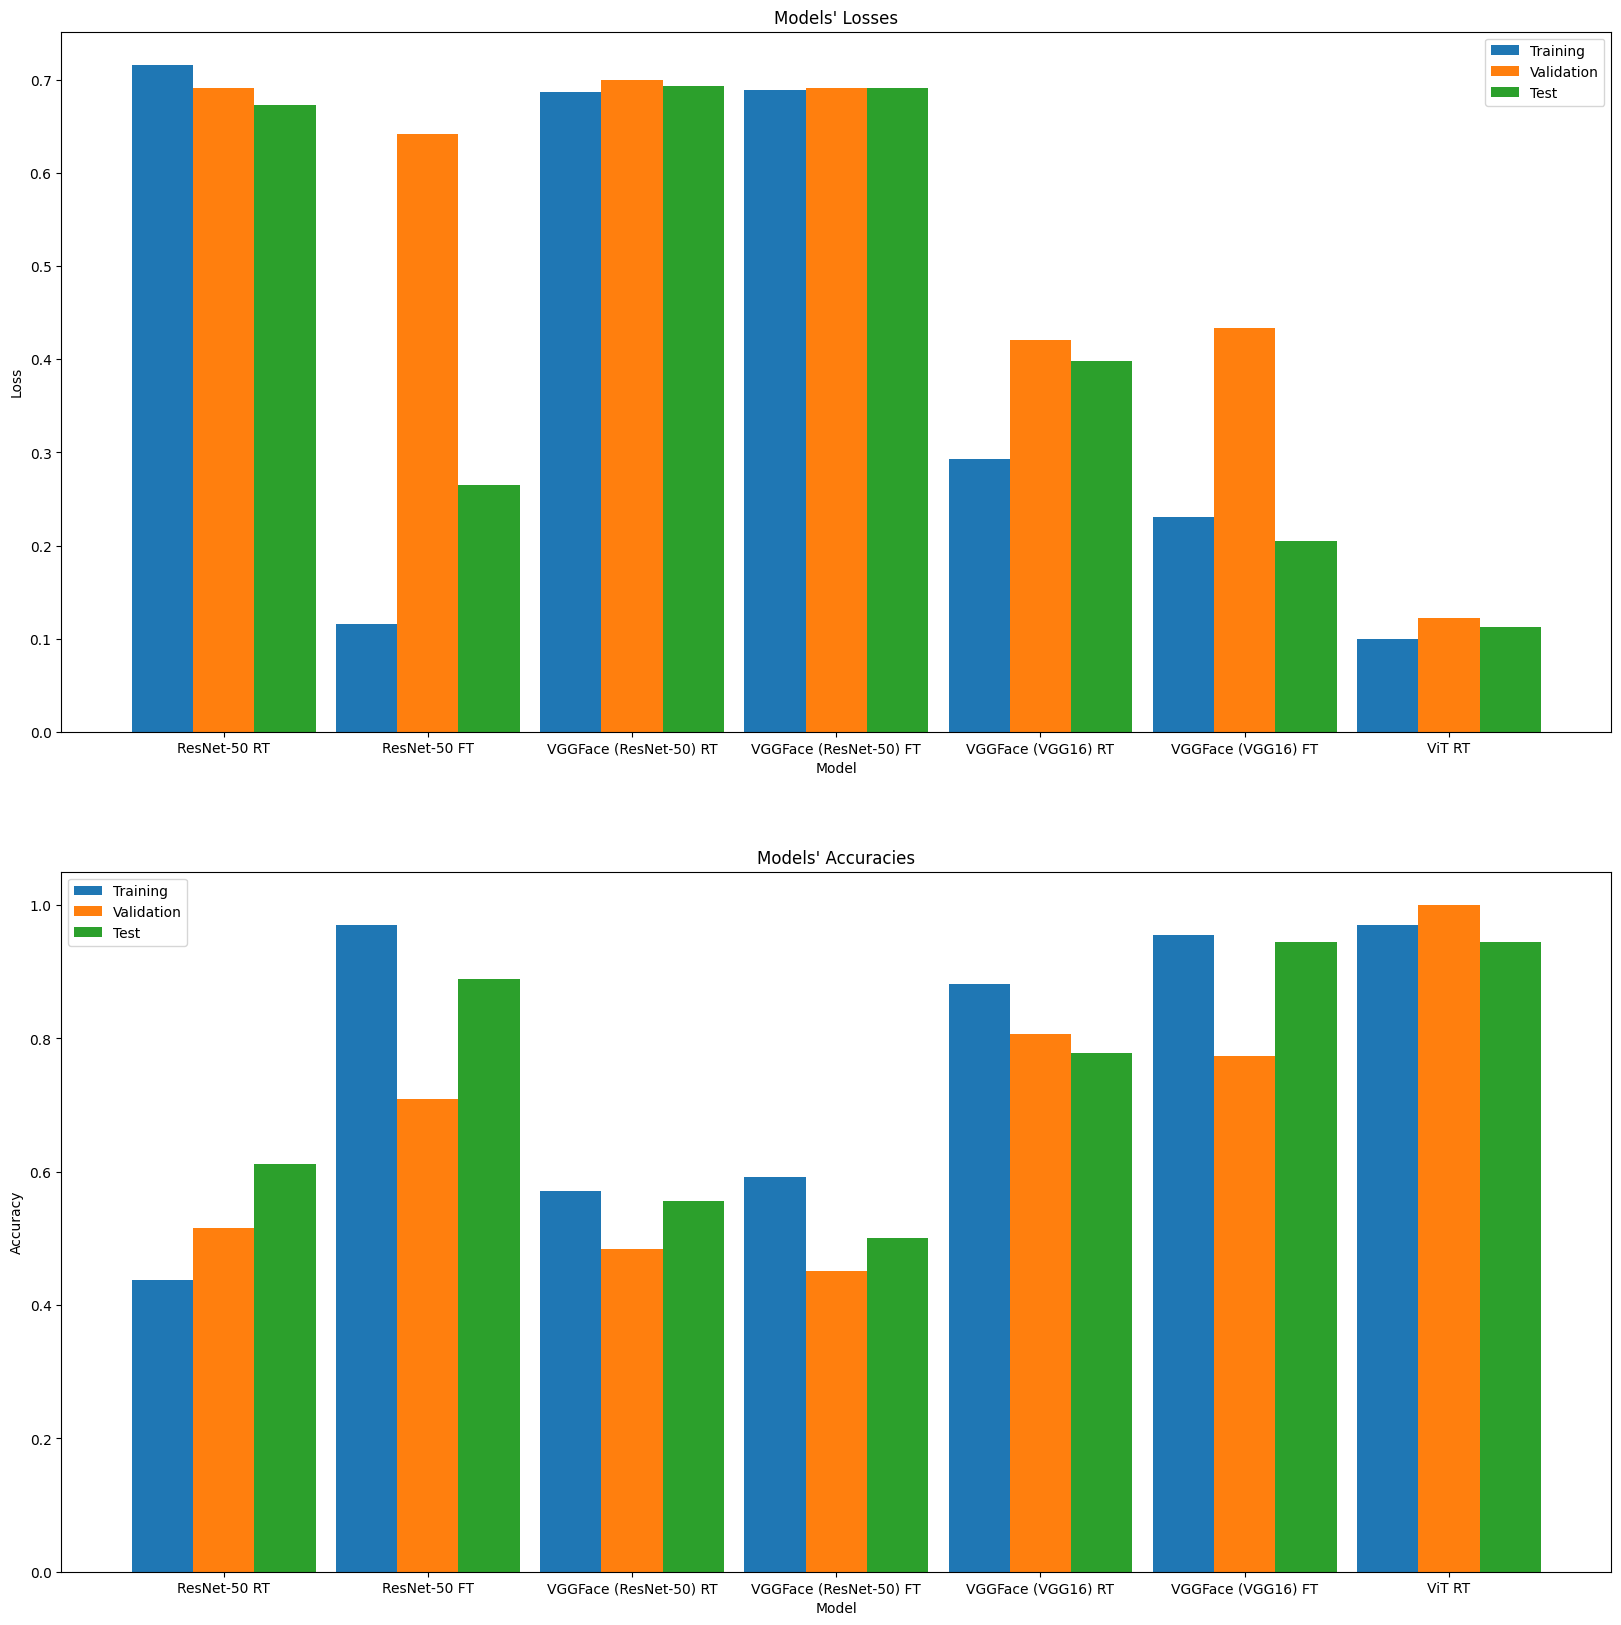

In [7]:
plt.rcdefaults()

labels = scores.keys()

train_losses = [scores[k][0][0] for k in labels]
valid_losses = [scores[k][1][0] for k in labels]
test_losses = [scores[k][2][0] for k in labels]

train_accuracies = [scores[k][0][1] for k in labels]
valid_accuracies = [scores[k][1][1] for k in labels]
test_accuracies = [scores[k][2][1] for k in labels]


print(train_accuracies)

# plot the results
fig, axs = plt.subplots(2, 1, figsize=(20,20))

# fig.tight_layout()

x = np.arange(len(labels))
width = 0.3

plt.subplot(2, 1, 1)
rects1 = plt.bar(x-.3, train_losses, width, label='Training')
rects2 = plt.bar(x, valid_losses, width, label='Validation')
rects3 = plt.bar(x+.3, test_losses, width, label='Test')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title("Models' Losses")
plt.xticks(x, labels)
plt.legend()

plt.subplot(2, 1, 2)
rects1 = plt.bar(x-.3, train_accuracies, width, label='Training')
rects2 = plt.bar(x, valid_accuracies, width, label='Validation')
rects3 = plt.bar(x+.3, test_accuracies, width, label='Test')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title("Models' Accuracies")
plt.xticks(x, labels)
plt.legend()

# plt.savefig("evaluation.png", bbox_inches="tight")

plt.show()